## Fixed parameter search

This notebook is intendend to find the best matching values for fixed parameters to be used in the simulation.

These parameters include:
- Distribution of time between orders.
    - Probably exponential distribution, extension of Poisson dist
- Distribution of token size of trades
    - Possibly different for buy and sell orders
- Buy or Sell order
    - Some function of past X trades completed. This is undecided yet.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from scipy.stats import kstest, expon
from scipy.stats import halfgennorm, pareto, exponnorm, lognorm
from fitter import Fitter, get_common_distributions, get_distributions
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from scipy.special import expit, logit
from statsmodels.tsa.statespace.sarimax import SARIMAX
from scipy import stats

pair_list = [
            ("AGIX-WETH", "https://www.dextools.io/app/en/ether/pair-explorer/0xe45b4a84e0ad24b8617a489d743c52b84b7acebe", 40),
            ("HEX-WETH", "https://www.dextools.io/app/en/ether/pair-explorer/0x55d5c232d921b9eaa6b37b5845e439acd04b4dba", 100),
            ("OPTIMUS-WETH", "https://www.dextools.io/app/en/ether/pair-explorer/0x8de7a9540e0edb617d78ca5a7c6cc18295fd8bb9", 70),
            ("SHIB-WETH", "https://www.dextools.io/app/en/ether/pair-explorer/0x811beed0119b4afce20d2583eb608c6f7af1954f", 50),
            ("SHIK-WETH", "https://www.dextools.io/app/en/ether/pair-explorer/0x0b9f5cef1ee41f8cccaa8c3b4c922ab406c980cc", 60),
            ("BabyDoge-WBNB", "https://www.dextools.io/app/en/bnb/pair-explorer/0xc736ca3d9b1e90af4230bd8f9626528b3d4e0ee0", 180),
            ("FLOKI-WBNB", "https://www.dextools.io/app/en/bnb/pair-explorer/0x231d9e7181e8479a8b40930961e93e7ed798542c", 180),
            ("INJ-WBNB", "https://www.dextools.io/app/en/bnb/pair-explorer/0x1bdcebca3b93af70b58c41272aea2231754b23ca", 60),
            ("MBOX-WBNB", "https://www.dextools.io/app/en/bnb/pair-explorer/0x8fa59693458289914db0097f5f366d771b7a7c3f", 90),
            ("VOLT-WBNB", "https://www.dextools.io/app/en/bnb/pair-explorer/0x487bfe79c55ac32785c66774b597699e092d0cd9", 200)
            ]

In [2]:
def load_csv_to_df(file_path, verbose=False, name=""):
    # Load CSV file into a DataFrame
    df = pd.read_csv(file_path)
    
    # If verbose mode is enabled, print the dataset name, number of rows, and some datetime information
    if verbose:
        #print(name)
        print("Number of rows:", len(df))
        print("Last datetime:", df.datetime.iloc[-2], )  # Assuming there is a "datetime" column in the DataFrame
        print("First datetime:", df.datetime.iloc[0])
        print("Time difference (in days):", datetime.strptime(df.datetime.iloc[0], '%Y-%m-%d %H:%M:%S') - datetime.strptime(df.datetime.iloc[-5], '%Y-%m-%d %H:%M:%S'))
        print()
    
    # Return the DataFrame
    return df

def set_index(df, info=False):
    # Convert 'datetime' column to datetime type and set it as the index
    df['datetime'] = pd.to_datetime(df['datetime'])
    df.set_index('datetime', inplace=True)
    
    if info:
        # Print some information about the resulting DataFrame
        df.info()

~~~---AGIX-WETH---~~~


Fitting 1 distributions: 100%|██████████| 1/1 [00:00<00:00,  8.15it/s]


{'pareto': {'b': 1.745256501505081, 'loc': -389.25591526172104, 'scale': 389.255915261721}}
        sumsquare_error          aic           bic  kl_div  ks_statistic  \
pareto     2.342066e-07  2391.206317 -86716.118948     inf      0.094405   

           ks_pvalue  
pareto  4.194309e-29  


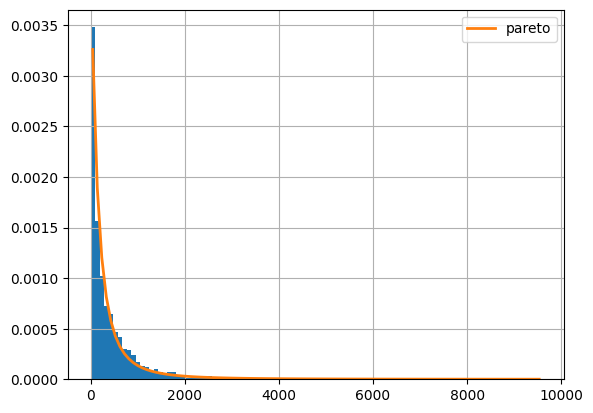

~~~---HEX-WETH---~~~


Fitting 1 distributions: 100%|██████████| 1/1 [00:00<00:00, 52.77it/s]

{'pareto': {'b': 0.13156222603297693, 'loc': -0.012204652710180891, 'scale': 0.01220465271018089}}
        sumsquare_error          aic            bic  kl_div  ks_statistic  \
pareto         0.000104  2162.684902 -272838.537246     inf      0.480164   

        ks_pvalue  
pareto        0.0  


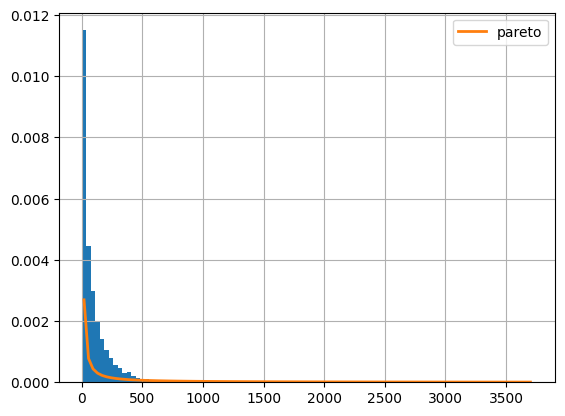

~~~---OPTIMUS-WETH---~~~


Fitting 1 distributions: 100%|██████████| 1/1 [00:00<00:00, 33.88it/s]


{'pareto': {'b': 3.0278565774644837, 'loc': -346.0979909671822, 'scale': 346.09799096718217}}
        sumsquare_error          aic            bic  kl_div  ks_statistic  \
pareto         0.000001  2347.056313 -201773.285431     inf      0.068345   

           ks_pvalue  
pareto  9.405903e-37  


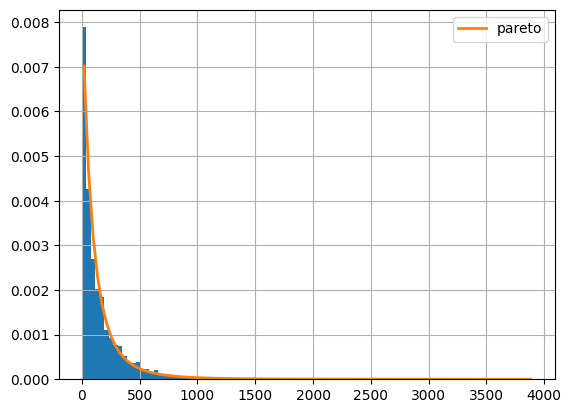

~~~---SHIB-WETH---~~~


Fitting 1 distributions: 100%|██████████| 1/1 [00:00<00:00, 43.63it/s]


{'pareto': {'b': 3.8978294074584037, 'loc': -964.5665182435664, 'scale': 964.5665182435663}}
        sumsquare_error         aic            bic  kl_div  ks_statistic  \
pareto     5.718207e-07  2191.78327 -108585.419269     inf      0.052214   

           ks_pvalue  
pareto  1.046393e-11  


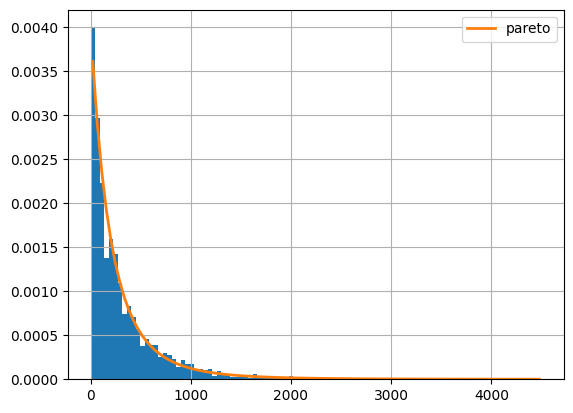

~~~---SHIK-WETH---~~~


Fitting 1 distributions: 100%|██████████| 1/1 [00:00<00:00, 58.65it/s]

{'pareto': {'b': 1.9063660838490482, 'loc': -377.2048411410694, 'scale': 377.2048411410693}}


        sumsquare_error         aic            bic  kl_div  ks_statistic  \
pareto     1.305681e-07  2299.27532 -104388.590387     inf      0.074461   

           ks_pvalue  
pareto  3.118487e-21  


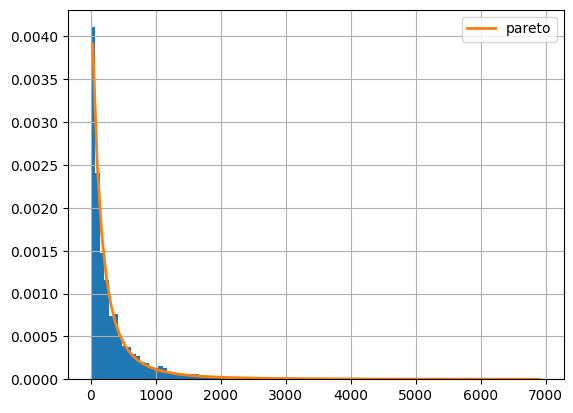

~~~---BabyDoge-WBNB---~~~


Fitting 1 distributions: 100%|██████████| 1/1 [00:00<00:00, 22.39it/s]


{'pareto': {'b': 4.094094443821321, 'loc': -231.33122962624543, 'scale': 231.3312296262454}}
        sumsquare_error          aic            bic  kl_div  ks_statistic  \
pareto         0.000002  3859.965146 -428301.879619     inf      0.038627   

           ks_pvalue  
pareto  2.411822e-24  


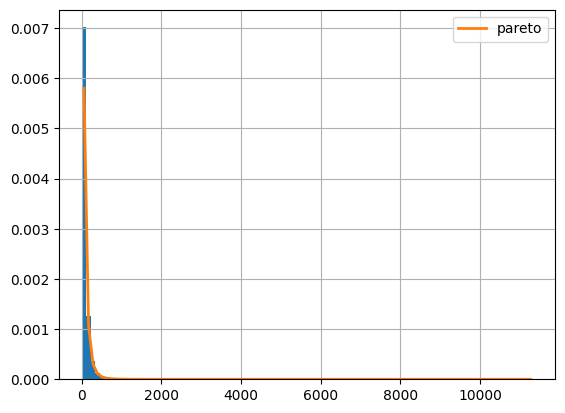

~~~---FLOKI-WBNB---~~~


Fitting 1 distributions: 100%|██████████| 1/1 [00:00<00:00, 29.34it/s]
pareto was not fitted. no parameters available
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


        sumsquare_error  aic  bic  kl_div  ks_statistic  ks_pvalue
pareto              inf  inf  inf     inf           NaN        NaN


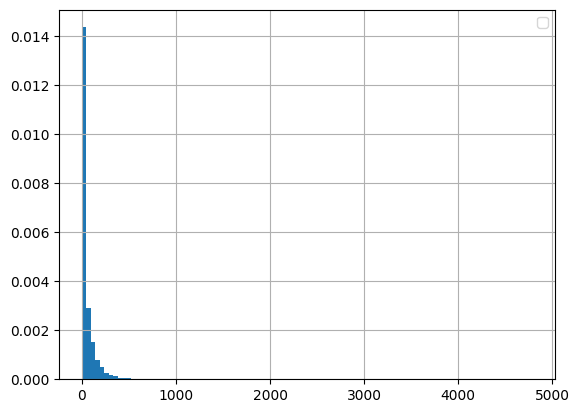

~~~---INJ-WBNB---~~~


Fitting 1 distributions: 100%|██████████| 1/1 [00:00<00:00, 83.91it/s]

{'pareto': {'b': 0.1978036306662874, 'loc': -0.19737203451431137, 'scale': 0.19737203451431135}}


        sumsquare_error          aic            bic  kl_div  ks_statistic  \
pareto         0.000052  2164.845114 -141276.164888     inf      0.272212   

        ks_pvalue  
pareto        0.0  


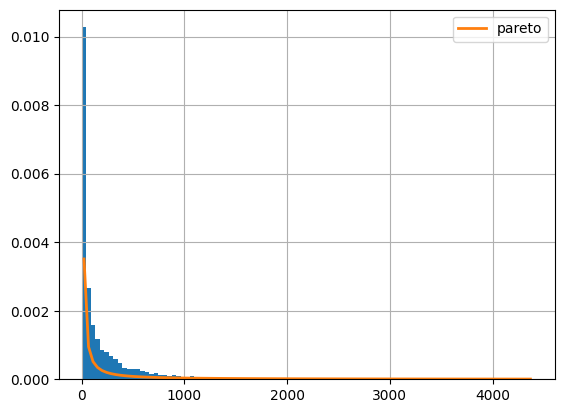

~~~---MBOX-WBNB---~~~


Fitting 1 distributions: 100%|██████████| 1/1 [00:00<00:00, 39.71it/s]

{'pareto': {'b': 0.7269964685202271, 'loc': -16.543315871580344, 'scale': 16.54331587158034}}


        sumsquare_error          aic           bic  kl_div  ks_statistic  \
pareto         0.000003  2185.936527 -265544.59216     inf      0.143879   

            ks_pvalue  
pareto  7.331623e-219  


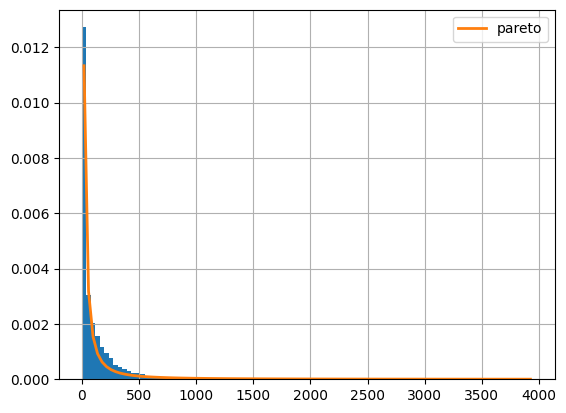

~~~---VOLT-WBNB---~~~


Fitting 1 distributions: 100%|██████████| 1/1 [00:00<00:00, 27.27it/s]

{'pareto': {'b': 1.7955352612365745, 'loc': -59.84038331598168, 'scale': 59.840383315981676}}


        sumsquare_error          aic            bic  kl_div  ks_statistic  \
pareto         0.000008  3241.139209 -386764.221073     inf      0.074634   

           ks_pvalue  
pareto  1.122998e-87  


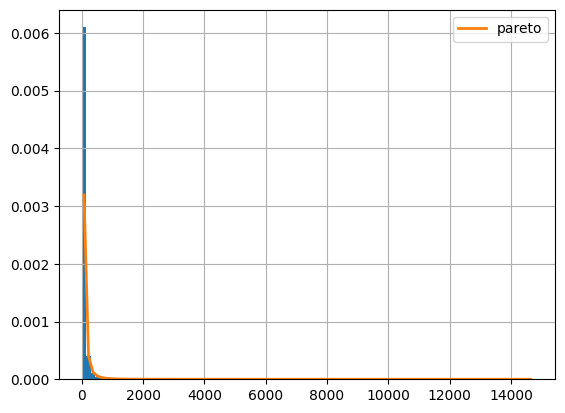

In [3]:
##Part 1 - The time spacing
table_dists = []
for pair in pair_list:
    #geting name of current pair and folder location
    name = pair[0]
    #print(name)
    # if name == "FLOKI-WBNB":
    #     continue
    print(f"~~~---{name}---~~~")
    file_path = f"D:/Dokumenty/Vejška/Magisterské studium/DIPLOMKA/Code_and_Data/Data_scraping/DEX_data_scraper/complete_data/{name}/{name}_complete.csv"

    #loading data without werbose printout, seting index
    df = load_csv_to_df(file_path, verbose=False, name = name)
    set_index(df, info=False)


    #compute the spacing between variables
    spacing = np.diff(df.index).astype('timedelta64[s]').astype(int) *-1

    #Cropping data to 99th percentile
    percentile_99 = np.percentile(spacing, 99)
    spacing_99 = [val for val in spacing if val <= percentile_99]

    basic_expon = False
    if basic_expon:
        param = expon.fit(spacing_99)
        print(param)

        statistic, p_value = kstest(spacing_99, 'expon', args=param)

        # Print the p-value
        print("The p-value is:", p_value)

    fitter_dist_fitting = True
    if fitter_dist_fitting:
        #dists = get_common_distributions()
        #dists.append('exponweib')
        #dists = get_distributions()
        # dists = ['gamma',
        #         'lognorm',
        #         "beta",
        #         "burr",
        #         "norm",
        #         "expon", 
        #         "exponnorm", 
        #         "exponpow",
        #          "exponweib",
        #          "truncexpon",
        #          "pareto",
        #          "cauchy",
        #          "gumbel_r",
        #          "laplace"]

        ###Candidate distributions selected based on running all dists on several tokens
        # d = get_common_distributions()
        # d.extend(['johnsonsb', 'fatiguelife', 'exponweib', 'gengamma', 'halfgennorm'])
        # d.extend(['pareto', 'expon', 'halflogistic', 'cauchy', 'moyal'])
        # d.extend(['fatiguelife', 'exponweib', 'gengamma', 'halfgennorm', 'lognorm'])
        # d.extend(['invgauss', 'betaprime', 'halfcauchy', 'fatiguelife', 'genextreme'])
        # d.extend(['invgauss', 'betaprime', 'halfcauchy', 'fatiguelife', 'genextreme'])
        # d.extend(['pareto', 'expon', 'cauchy', 'moyal', 'gumbel_r'])
        # d.extend(['f', 'kappa3', 'alpha', 'beta', 'bradford'])
        # d.extend(['expon', 'cauchy', 'laplace', 'gumbel_r', 'logistic'])
        # dists = list(set(d))

        #dists = ['expon', 'pareto', 'halfgennorm']
        #dists = ['halfgennorm']
        dists = ['pareto']
        #dists = ['expon']

        f = Fitter(spacing,
           distributions=dists)
        f.fit()
        
        try:
            print(f.get_best())     #here I end up. The goal is to estimate distributions from which draw times. 
                                    #heaving three is a good way I think. One of them will be halfgennorm with beta = 0.4
                                    #What to do next: check that the selected first dist will be ok if I set parameter beta fixed to 0.4, plot i histograms as random sample. Do the same for pareto. end expon                               
        except:
            pass                                    
        print(f.summary())
        plt.show()

        Nbest = 5
        ###Try to get x best dists
        names = f.df_errors.sort_values(
                    by="bic").index[0:Nbest].values
        
        #print(names)
        
        
    
        do_dist_table = False
        if do_dist_table:
            row = [name[:-5]]
            for element in dists:
                if element in names:
                    row.append(1)
                else:
                    row.append(" ")
            table_dists.append(row)
            #print(names)

        

        ##TODO here is a rest - do better search on all distributions, with restarted runs and full samples

        ##lets try three runs on the first token
        #run 1: ['johnsonsb', 'fatiguelife', 'exponweib', 'gengamma', 'halfgennorm'] (not restarted)
        #run 2: ['pareto', 'expon', 'halflogistic', 'cauchy', 'moyal'] (restarted)
        #run 3: ['fatiguelife', 'exponweib', 'gengamma', 'halfgennorm', 'lognorm'] (not restarted)
        #run 4: ['fatiguelife' 'exponweib' 'gengamma' 'halfgennorm' 'levy'] (restarted + bic selection)

        ##Two runs on OPTIMUS
        #run 1: ['invgauss', 'betaprime', 'halfcauchy', 'fatiguelife', 'genextreme'] (restarted)
        #run 2: ['invgauss', 'betaprime', 'halfcauchy', 'fatiguelife', 'genextreme'] (restarted)
        #run 3: ['pareto', 'expon', 'cauchy', 'moyal', 'gumbel_r'] (not restarted)

        ##Two runs at FLOKI
        #run 1: ['f', 'kappa3', 'alpha', 'beta', 'bradford'] (restarted)
        #run 2: ['expon', 'cauchy', 'laplace', 'gumbel_r', 'logistic'] (not restarted)

if do_dist_table:        
    table_dists = pd.DataFrame(table_dists)
    #table_dists.set_index(table_dists.iloc[:, 0], inplace=True)
    #table_dists.columns = ["Token"].extend(dists)
    colnames = list(["Token"])
    colnames.extend(dists)
    table_dists.columns = colnames
    #print(table_dists)
    #table_dists.to_csv(r"D:\Dokumenty\Vejška\Magisterské studium\DIPLOMKA\Tables\Timing_distributions_scores.csv", index=False)


    #once at home, try to run on all distributions, and set the max names to 10
    

In [4]:
%%script false
for pair in pair_list:
    #geting name of current pair and folder location
    name = pair[0]
    #print(name)
    # if name == "FLOKI-WBNB":
    #     continue
    print(f"~~~---{name}---~~~")
    file_path = f"D:/Dokumenty/Vejška/Magisterské studium/DIPLOMKA/Code_and_Data/Data_scraping/DEX_data_scraper/complete_data/{name}/{name}_complete.csv"

    #loading data without werbose printout, seting index
    df = load_csv_to_df(file_path, verbose=False, name = name)
    set_index(df, info=False)


    #compute the spacing between variables
    spacing = np.diff(df.index).astype('timedelta64[s]').astype(int) *-1

    #Cropping data to 99th percentile
    percentile_99 = np.percentile(spacing, 99)
    spacing_99 = [val for val in spacing if val <= percentile_99]


    #Try to compare data with random sample from the fitted distributions
    #r = halfgennorm.rvs(beta = 0.4, loc=0, scale=4, size=5000)#This is how to draw random sample from halfgennorm - this will be my setting number one, it fits many distributions well (only first parameter decides about shape of dist., seconf is always 0 and third about size)
    #r = pareto.rvs(b = 2.5, loc=-80, scale=80, size=5000) #This I guess will by my second distribution
    r = expon.rvs(loc = 0, scale=300, size = 5000) #And this could be the third one
    #
    #{'pareto': {'b': 6.793733998573082, 'loc': -400.09425046951173, 'scale': 400.0942504695117}
    #{'expon': {'loc': 0.0, 'scale': 306.1414913957935}}
    

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
    axes[0].hist(spacing, bins=100, color='blue', edgecolor='black')
    axes[0].set_title(f'{name} Histogram of Spacing between Observations')

    axes[1].hist(r, bins=100, color='red', edgecolor='black')
    axes[1].set_title('Random sample')
    
    #plt.hist(spacing_99, bins=100, edgecolor='black')
    plt.show()

Couldn't find program: 'false'


~~~---AGIX-WETH---~~~


Fitting 1 distributions: 100%|██████████| 1/1 [00:00<00:00,  8.23it/s]

{'lognorm': {'s': 1.7486228235070342, 'loc': -4.119400759106176, 'scale': 886.6765460384474}}


         sumsquare_error          aic           bic  kl_div  ks_statistic  \
lognorm     1.414412e-08  2972.822095 -97112.113184     inf      0.157628   

            ks_pvalue  
lognorm  1.175776e-80  


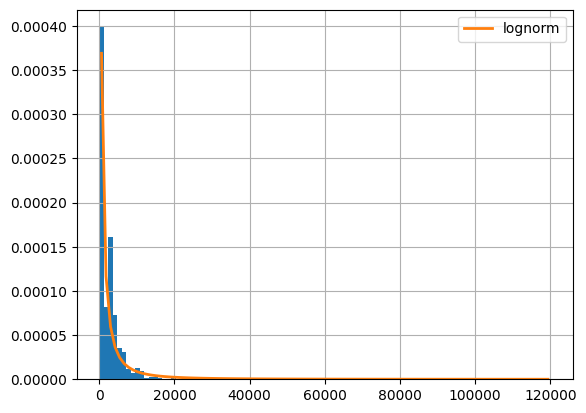

~~~---HEX-WETH---~~~


Fitting 1 distributions: 100%|██████████| 1/1 [00:00<00:00,  4.35it/s]


{'lognorm': {'s': 1.5791385393195876, 'loc': -17.459380581617545, 'scale': 2723.856980075994}}
         sumsquare_error          aic            bic  kl_div  ks_statistic  \
lognorm     6.775732e-10  4294.423986 -446498.167906     inf       0.01871   

         ks_pvalue  
lognorm   0.000075  


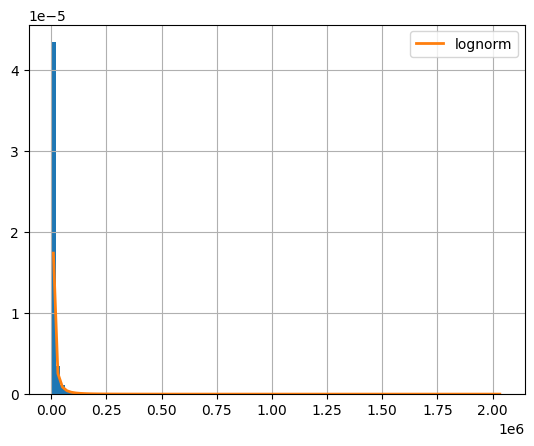

~~~---OPTIMUS-WETH---~~~


Fitting 1 distributions: 100%|██████████| 1/1 [00:00<00:00,  7.65it/s]

{'lognorm': {'s': 1.7793370589022515, 'loc': -11.764789221063017, 'scale': 977.6967898020146}}


         sumsquare_error          aic            bic  kl_div  ks_statistic  \
lognorm     6.321901e-09  3010.267105 -250120.861275     inf       0.07358   

            ks_pvalue  
lognorm  1.529377e-42  


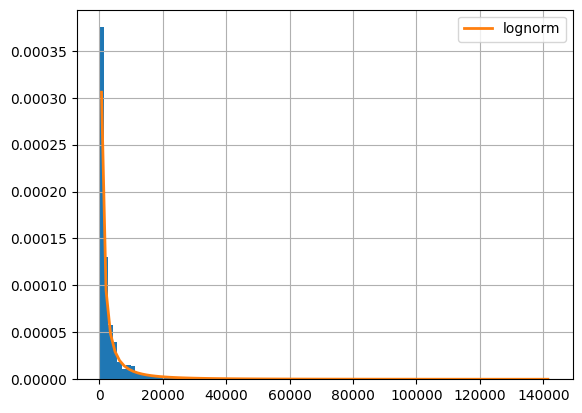

~~~---SHIB-WETH---~~~


Fitting 1 distributions: 100%|██████████| 1/1 [00:00<00:00,  6.49it/s]

{'lognorm': {'s': 2.1735291099829013, 'loc': -9704.61225460867, 'scale': 6276580.203958074}}


         sumsquare_error          aic            bic  kl_div  ks_statistic  \
lognorm     1.168661e-16  5307.326205 -214720.673684     inf      0.065469   

            ks_pvalue  
lognorm  3.626789e-18  


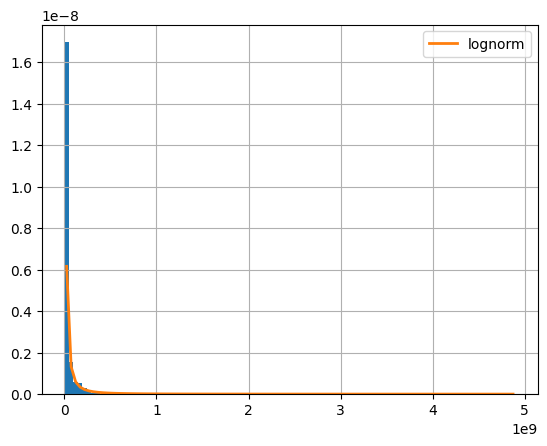

~~~---SHIK-WETH---~~~


Fitting 1 distributions: 100%|██████████| 1/1 [00:00<00:00,  8.37it/s]

{'lognorm': {'s': 1.5037133388610298, 'loc': -2056319550.447643, 'scale': 122432990872.83214}}


         sumsquare_error          aic            bic  kl_div  ks_statistic  \
lognorm     4.873973e-25  6308.965774 -277451.553574     inf       0.04596   

            ks_pvalue  
lognorm  2.361205e-08  


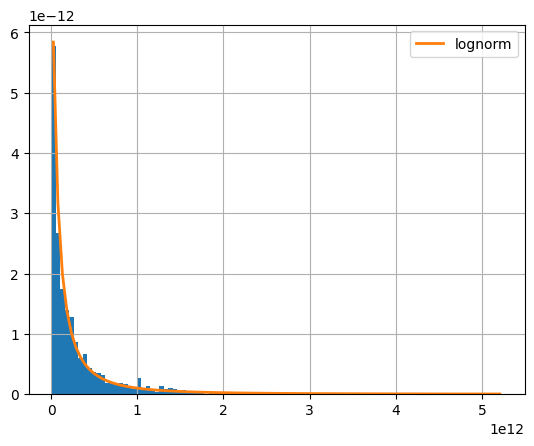

~~~---BabyDoge-WBNB---~~~


Fitting 1 distributions: 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]


{'lognorm': {'s': 1.8123158713214913, 'loc': -53863055.7409897, 'scale': 12193202730.804386}}
         sumsquare_error          aic           bic  kl_div  ks_statistic  \
lognorm     5.586824e-25  8709.125312 -1.211061e+06     inf      0.020848   

            ks_pvalue  
lognorm  2.146183e-07  


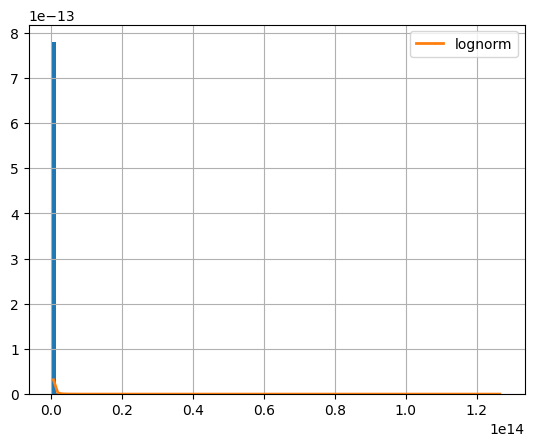

~~~---FLOKI-WBNB---~~~


Fitting 1 distributions: 100%|██████████| 1/1 [00:00<00:00,  1.79it/s]


{'lognorm': {'s': 2.9663530933838462, 'loc': -6.019016067482029, 'scale': 542105.4728978141}}
         sumsquare_error          aic           bic  kl_div  ks_statistic  \
lognorm     7.560900e-16  5218.150898 -1.186438e+06     inf      0.054361   

            ks_pvalue  
lognorm  3.645746e-68  


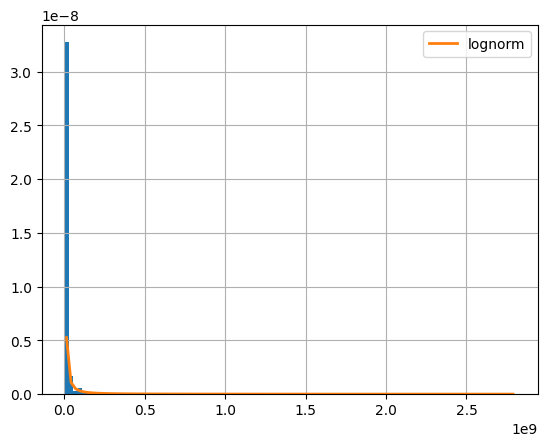

~~~---INJ-WBNB---~~~


Fitting 1 distributions: 100%|██████████| 1/1 [00:00<00:00,  9.85it/s]

{'lognorm': {'s': 0.7774931162055179, 'loc': -8.021225457480618, 'scale': 46.072269282540475}}
         sumsquare_error          aic            bic  kl_div  ks_statistic  \
lognorm         0.000136  3203.250436 -134098.886603     inf      0.164544   

             ks_pvalue  
lognorm  1.930260e-178  


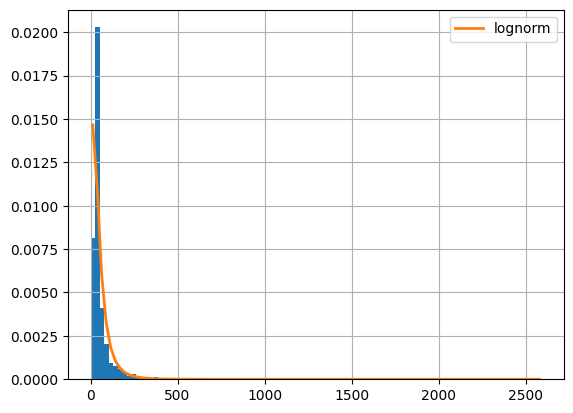

~~~---MBOX-WBNB---~~~


Fitting 1 distributions: 100%|██████████| 1/1 [00:00<00:00,  5.37it/s]


{'lognorm': {'s': 2.2297975989988412, 'loc': -0.15149545749789972, 'scale': 320.11491707316554}}
         sumsquare_error          aic            bic  kl_div  ks_statistic  \
lognorm     5.798249e-08  3102.984469 -315103.659988     inf      0.121799   

             ks_pvalue  
lognorm  8.953869e-157  


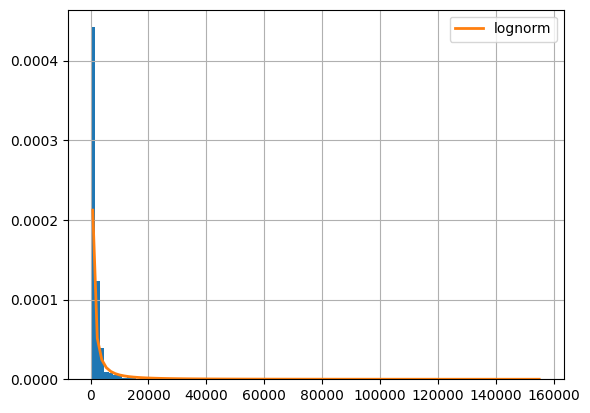

~~~---VOLT-WBNB---~~~


Fitting 1 distributions: 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]


{'lognorm': {'s': 16.593906858372108, 'loc': 9.963967339432207e-11, 'scale': 28.911343367373888}}
         sumsquare_error          aic           bic  kl_div  ks_statistic  \
lognorm     2.317103e-18  5542.970098 -907659.98209     inf      0.731693   

         ks_pvalue  
lognorm        0.0  


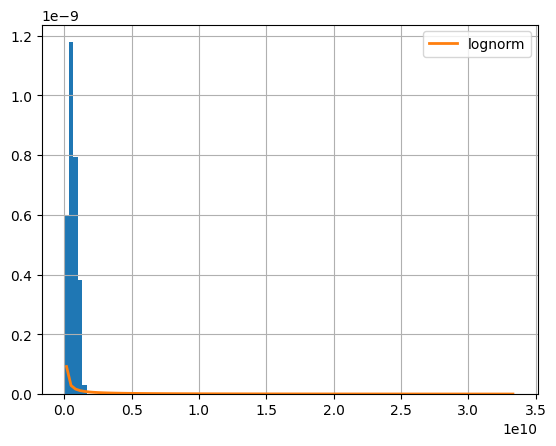

In [5]:
#%%script false
###Part 2 - distribution of order size
table_dists = []
for pair in pair_list:
    #geting name of current pair and folder location
    name = pair[0]
    #print(name)
    # if name == "FLOKI-WBNB":
    #     continue
    print(f"~~~---{name}---~~~")
    file_path = f"D:/Dokumenty/Vejška/Magisterské studium/DIPLOMKA/Code_and_Data/Data_scraping/DEX_data_scraper/complete_data/{name}/{name}_complete.csv"

    #loading data without werbose printout, seting index
    df = load_csv_to_df(file_path, verbose=False, name = name)
    set_index(df, info=False)

    log_amount_token = np.log10(df.amount_token)
    log_total_native = np.log10(df.total_native)

    percentile_99_swap = np.percentile(df.amount_token, 100)
    swap_99 = [val for val in df.amount_token if val <= percentile_99_swap]

    ##Distribution fitting
    #dists = get_common_distributions()
    #dists = get_distributions()
    ###Candidate distributions selected based on running all dists on all tokens
    # d = get_common_distributions()
    # d.extend(['halfgennorm', 'burr12', 'pareto', 'genpareto', 'fisk'])
    # d.extend(['halflogistic', 'gumbel_r', 'genlogistic', 'moyal', 'expon'])
    # d.extend(['halfcauchy', 'foldcauchy', 'genpareto', 'pareto', 'invgamma'])
    # d.extend(['exponnorm', 'expon', 'genexpon', 'moyal', 'halflogistic'])
    # d.extend(['pareto', 'expon', 'cauchy', 'powerlaw', 'laplace'])

    # d.extend(['halfnorm', 'foldnorm', 'rayleigh', 'maxwell', 'kstwobign'])
    # d.extend(['halflogistic', 'expon', 'laplace_asymmetric', 'exponnorm', 'gumbel_r'])
    # d.extend(['dgamma', 'dweibull', 'foldcauchy', 'laplace', 'cauchy'])
    # d.extend(['gilbrat', 'gibrat', 'exponnorm', 'expon', 'laplace_asymmetric'])
    # d.extend(['exponnorm', 'genlogistic', 'beta', 'betaprime', 'maxwell'])
    # dists = list(set(d))

    #dists = ['expon', 'exponnorm', 'lognorm', 'pareto']
    #dists = ['exponnorm']
    dists = ['lognorm']

    f = Fitter(df.amount_token,
           distributions=dists)
    f.fit()
    try:
        print(f.get_best())     
    except:
        pass                                    
    print(f.summary())
    plt.show()

    Nbest = 5
    #Get names of x best dists
    names = f.df_errors.sort_values(
                by="bic").index[0:Nbest].values
        
    #print(names)

       
    do_dist_table = False
    if do_dist_table:
        row = [name[:-5]]
        for element in dists:
            if element in names:
                row.append(1)
            else:
                row.append(" ")
        table_dists.append(row)
    ##AGIX
    #['halfgennorm' 'burr12' 'pareto' 'genpareto' 'fisk']
    ##HEX
    #['halflogistic' 'gumbel_r' 'genlogistic' 'moyal' 'expon']
    #OPTIMUS
    #['halfcauchy' 'foldcauchy' 'genpareto' 'pareto' 'invgamma']
    ##SHIB
    #['exponnorm' 'expon' 'genexpon' 'moyal' 'halflogistic']
    ##SHIK
    #['pareto' 'expon' 'cauchy' 'powerlaw' 'laplace']
    ##BabyDoge
    #['halfnorm' 'foldnorm' 'rayleigh' 'maxwell' 'kstwobign']
    ##FLOKI
    #['halflogistic' 'expon' 'laplace_asymmetric' 'exponnorm' 'gumbel_r']
    ##INJ
    #['dgamma' 'dweibull' 'foldcauchy' 'laplace' 'cauchy']
    ##MBOX
    #['gilbrat' 'gibrat' 'exponnorm' 'expon' 'laplace_asymmetric']
    ##VOLT
    #['exponnorm' 'genlogistic' 'beta' 'betaprime' 'maxwell']




if do_dist_table:        
    table_dists = pd.DataFrame(table_dists)
    #table_dists.set_index(table_dists.iloc[:, 0], inplace=True)
    #table_dists.columns = ["Token"].extend(dists)
    colnames = list(["Token"])
    colnames.extend(dists)
    table_dists.columns = colnames
    print(table_dists)
    #table_dists.to_csv(r"D:\Dokumenty\Vejška\Magisterské studium\DIPLOMKA\Tables\Simulation_Swaps_distributions_scores.csv", index=False)
    #So I have three candidates: expon(does not fit theoretically but ok) exponnorm, lognorm

In [6]:
#%%script false
#Plotting candidates for the swap distributions - BUY/SELL together
for pair in pair_list:
    #geting name of current pair and folder location
    name = pair[0]
    #print(name)
    # if name == "FLOKI-WBNB":
    #     continue
    print(f"~~~---{name}---~~~")
    file_path = f"D:/Dokumenty/Vejška/Magisterské studium/DIPLOMKA/Code_and_Data/Data_scraping/DEX_data_scraper/complete_data/{name}/{name}_complete.csv"

    #loading data without werbose printout, seting index
    df = load_csv_to_df(file_path, verbose=False, name = name)
    set_index(df, info=False)



    ##Try to compare data with random sample from the fitted distributions
    r = [x for x in exponnorm.rvs(K = 4, loc = 100, scale=100, size = 5000) if x >0] #This is the first candidate
    #r = [x for x in lognorm.rvs(s = 1.7, loc = -10, scale=1000, size = 5000) if x >0] #Second candidate
    #r = pareto.rvs(b = 2.5, loc = -1, scale=1, size = 5000) #Third candidate


    
    #{'exponnorm': {'K': 0.6724023248251942, 'loc': 408637483.63543415, 'scale': 293053981.202839}}
    #{'lognorm': {'s': 1.7486228235070342, 'loc': -4.119400759106176, 'scale': 886.6765460384474}}
    #{'expon': {'loc': 0.0022, 'scale': 10293084.217959348}}
    #{'pareto': {'b': 1.4139999592805192, 'loc': -1818.527312148203, 'scale': 1818.527312248903}}

    do_plot = False
    if do_plot:
        transform_fun = lambda x: x
        #transform_fun = np.log10

        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
        axes[0].hist(transform_fun(df.amount_token), bins=100, color='blue', edgecolor='black')
        axes[0].set_title(f'{name} Histogram of Tokens Swapped')

        axes[1].hist(transform_fun(r), bins=100, color='red', edgecolor='black')
        axes[1].set_title('Random sample')
        
        #plt.hist(spacing_99, bins=100, edgecolor='black')
        plt.show()


    #analyzis of frequency of buy/sell orders
    # buys = len(df[df['buy_order'] == True])
    # sells = len(df[df['buy_order'] == False])
    # print(f"BUYs: {round(buys/len(df), 4)*100}% ({buys}), SELLs: {round(sells/len(df), 4)*100}% ({sells})")  
    ##Conclusion: the buy orders tend to dominate, but not enough it could be a rule...probably specific to each tokens
    # situation. I will not pursue this further, I will leave this on the model for BUY/SELL generation in the simulation  

~~~---AGIX-WETH---~~~
~~~---HEX-WETH---~~~
~~~---OPTIMUS-WETH---~~~
~~~---SHIB-WETH---~~~
~~~---SHIK-WETH---~~~
~~~---BabyDoge-WBNB---~~~
~~~---FLOKI-WBNB---~~~
~~~---INJ-WBNB---~~~
~~~---MBOX-WBNB---~~~
~~~---VOLT-WBNB---~~~


In [7]:
%%script false
#Plotting candidates for the swap distributions - BUY/SELL together
for pair in pair_list:
    #geting name of current pair and folder location
    name = pair[0]
    #print(name)
    # if name == "FLOKI-WBNB":
    #     continue
    print(f"~~~---{name}---~~~")
    file_path = f"D:/Dokumenty/Vejška/Magisterské studium/DIPLOMKA/Code_and_Data/Data_scraping/DEX_data_scraper/complete_data/{name}/{name}_complete.csv"

    #loading data without werbose printout, seting index
    df = load_csv_to_df(file_path, verbose=False, name = name)
    set_index(df, info=False)

    data_buy = df[df['buy_order'] == True]
    data_sell = df[df['buy_order'] == False]

    ##Try to compare data with random sample from the fitted distributions
    #r_buy = [x for x in exponnorm.rvs(K = 4, loc = 100, scale=100, size = 7500) if x >0] #This is the first candidate
    #r_sell = [x for x in exponnorm.rvs(K = 4, loc = 100, scale=100, size = 5000) if x >0]

    r_buy = [x for x in lognorm.rvs(s = 1.7, loc = -10, scale=1000, size = 5000) if x >0] #Second candidate
    r_sell = [x for x in lognorm.rvs(s = 1.7, loc = -10, scale=1000, size = 5000) if x >0]

    #r = pareto.rvs(b = 2.5, loc = -1, scale=1, size = 5000) #Third candidate


    
    #{'exponnorm': {'K': 0.6724023248251942, 'loc': 408637483.63543415, 'scale': 293053981.202839}}
    #{'lognorm': {'s': 1.7486228235070342, 'loc': -4.119400759106176, 'scale': 886.6765460384474}}
    #{'expon': {'loc': 0.0022, 'scale': 10293084.217959348}}
    #{'pareto': {'b': 1.4139999592805192, 'loc': -1818.527312148203, 'scale': 1818.527312248903}}

    
    #transform_fun = lambda x: x
    transform_fun = np.log10

    scale_hists = False #The plots look quite similar for buy and sell. What I could do also fix the axes...TODO Fix axes of the true data plots so they would be the same

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))
    #Setting the axes limit based on full dataset, common to both axis
    lower_x_lim = np.min(df.amount_token)
    higher_x_lim =  np.percentile(df.amount_token, 99.9)
    higher_y_lim = len(df) * 0.65

    rand_x_low_lim = np.min([np.min(r_buy), np.min(r_sell)])
    rand_x_high_lim = np.max([np.max(r_buy), np.max(r_sell)])
    #For now, I conclude there is no major difference for distribution of BUYs/SELLs.
    #BUYs
    axes[0,0].hist(transform_fun(data_buy.amount_token), bins=100, color='blue', edgecolor='black', density = scale_hists)
    axes[0,0].set_title(f'{name} Tokens Swapped - BUY')
    axes[0,0].set_xlim([transform_fun(lower_x_lim), transform_fun(higher_x_lim)])
    # axes[0,0].set_ylim([0, higher_y_lim])

    axes[0,1].hist(transform_fun(r_buy), bins=100, color='red', edgecolor='black', density = scale_hists)
    axes[0,1].set_title('Random sample - BUY')
    axes[0,1].set_xlim([transform_fun(rand_x_low_lim), transform_fun(rand_x_high_lim)])

    #SELLs
    axes[1,0].hist(transform_fun(data_sell.amount_token), bins=100, color='blue', edgecolor='black', density = scale_hists)
    axes[1,0].set_title(f'{name} Tokens Swapped - SELL')
    axes[1,0].set_xlim([transform_fun(lower_x_lim), transform_fun(higher_x_lim)])
    # axes[1,0].set_ylim([0, higher_y_lim])

    axes[1,1].hist(transform_fun(r_sell), bins=100, color='red', edgecolor='black', density = scale_hists)
    axes[1,1].set_title('Random sample - SELL')
    axes[1,1].set_xlim([transform_fun(rand_x_low_lim), transform_fun(rand_x_high_lim)])
    
    #plt.hist(spacing_99, bins=100, edgecolor='black')
    plt.show()

    share_buy = round(len(data_buy)/len(df), 2)*100
    share_sell = round(len(data_sell)/len(df), 2)*100

    mean_buy = round(np.mean(transform_fun(data_buy.amount_token)),4)
    mean_sell = round(np.mean(transform_fun(data_sell.amount_token)),4)

    var_buy = round(np.var(transform_fun(data_buy.amount_token)),4)
    var_sell = round(np.var(transform_fun(data_sell.amount_token)),4)

    skew_buy = round(stats.skew(transform_fun(data_buy.amount_token)),4)
    skew_sell = round(stats.skew(transform_fun(data_sell.amount_token)),4)

    kurt_buy = round(stats.kurtosis(transform_fun(data_buy.amount_token)),4)
    kurt_sell = round(stats.kurtosis(transform_fun(data_sell.amount_token)),4)
    ##Adding a print of statistics for BUY/SELL data
    print(f"BUY: share {share_buy}%, mean {mean_buy}, variance {var_buy}, skewness {skew_buy}, kurtosis {kurt_buy}")
    print("\n")
    print(f"SELL: share {share_sell}%, mean {mean_sell}, variance {var_sell}, skewness {skew_sell}, kurtosis {kurt_sell}")


Couldn't find program: 'false'


In [8]:
%%script false
#explore distribution of buy/sell order sizes separately
for pair in pair_list:
    #geting name of current pair and folder location
    name = pair[0]
    #print(name)
    # if name == "FLOKI-WBNB":
    #     continue
    print(f"~~~---{name}---~~~")
    file_path = f"D:/Dokumenty/Vejška/Magisterské studium/DIPLOMKA/Code_and_Data/Data_scraping/DEX_data_scraper/complete_data/{name}/{name}_complete.csv"

    #loading data without werbose printout, seting index
    df = load_csv_to_df(file_path, verbose=False, name = name)
    set_index(df, info=False)

    data_buy = df[df['buy_order'] == True]
    data_sell = df[df['buy_order'] == False]

    # data = data_buy.total_native
    # data = data_sell.amount_token


    #transform_fun = lambda x: x
    transform_fun = np.log10

    # Define the logarithmically spaced bins
    bins = np.logspace(np.log10(data_buy.amount_token.min()), np.log10(data_buy.amount_token.max()), 100)
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
    axes[0].hist(log_amount_token_b, bins=bins, color='blue', edgecolor='black')
    axes[0].set_title(f'{name} Native Tokens swapped_BUY')
    axes[0].set_xscale('log')
    axes[0].set_xlim(left = 5*10**(-2), right = 100)

    bins = np.logspace(np.log10(data_sell.amount_token.min()), np.log10(data_sell.amount_token.max()), 100)
    axes[1].hist(log_amount_token_s, bins=bins, color='red', edgecolor='black')
    axes[1].set_title(f'{name} Native Tokens swapped_SELL')
    axes[1].set_xscale('log')
    axes[1].set_xlim(left = 5*10**(-2), right = 100)

    #There is a difference, but very subtle. But probably worth trying fitting separetely.
    #Perhaps I might do an overall search on all dists, and then fit the candidates dists on buy/sell separetly..
    #TODO next 
    plt.show()


Couldn't find program: 'false'


~~~---AGIX-WETH---~~~


d:\Dokumenty\Vejška\Magisterské studium\DIPLOMKA\Code_and_Data\Data_scraping\DEX_data_scraper\venv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


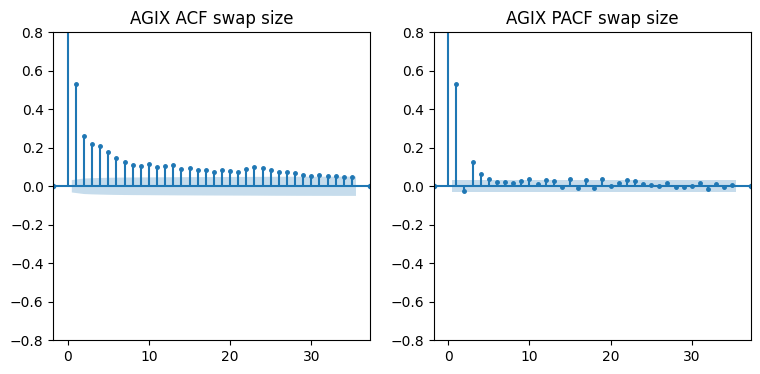

~~~---HEX-WETH---~~~


d:\Dokumenty\Vejška\Magisterské studium\DIPLOMKA\Code_and_Data\Data_scraping\DEX_data_scraper\venv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


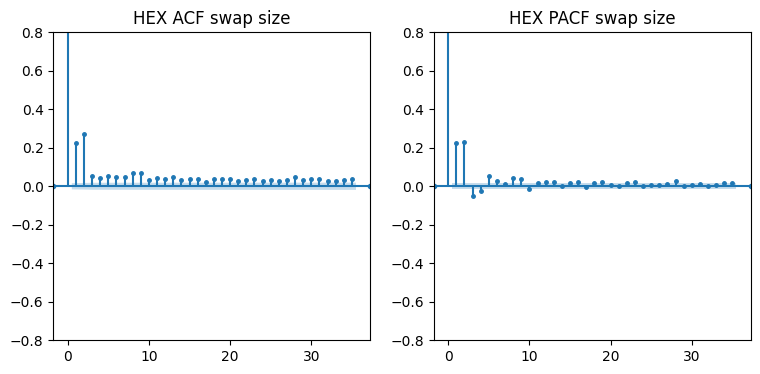

~~~---OPTIMUS-WETH---~~~


d:\Dokumenty\Vejška\Magisterské studium\DIPLOMKA\Code_and_Data\Data_scraping\DEX_data_scraper\venv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


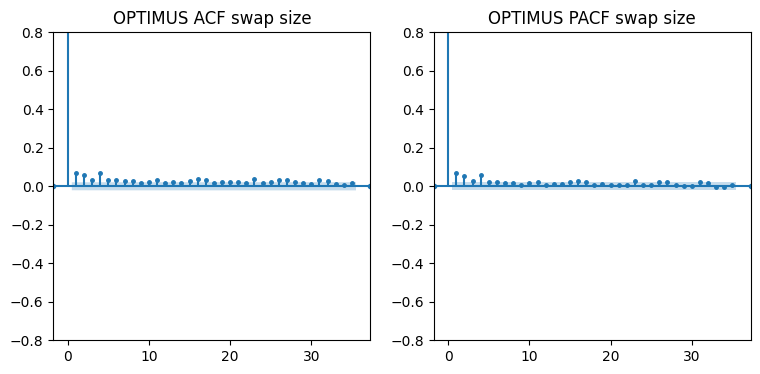

~~~---SHIB-WETH---~~~


d:\Dokumenty\Vejška\Magisterské studium\DIPLOMKA\Code_and_Data\Data_scraping\DEX_data_scraper\venv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


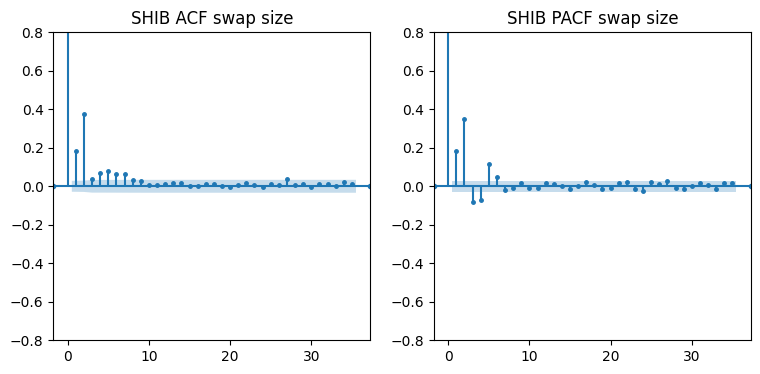

~~~---SHIK-WETH---~~~


d:\Dokumenty\Vejška\Magisterské studium\DIPLOMKA\Code_and_Data\Data_scraping\DEX_data_scraper\venv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


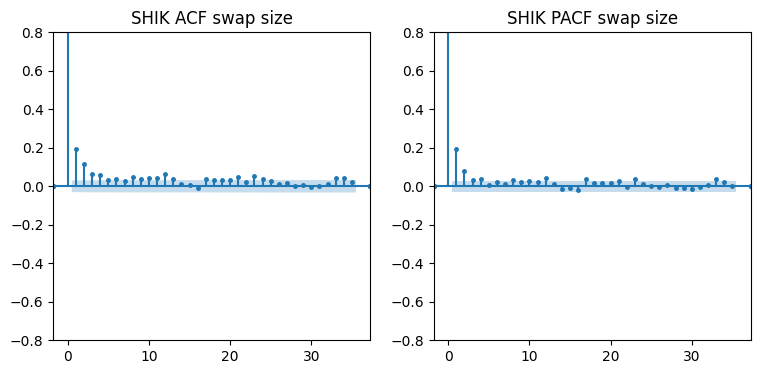

~~~---BabyDoge-WBNB---~~~


d:\Dokumenty\Vejška\Magisterské studium\DIPLOMKA\Code_and_Data\Data_scraping\DEX_data_scraper\venv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


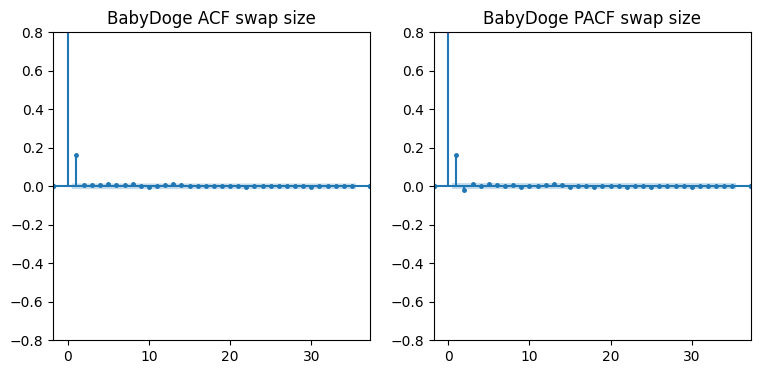

~~~---FLOKI-WBNB---~~~


d:\Dokumenty\Vejška\Magisterské studium\DIPLOMKA\Code_and_Data\Data_scraping\DEX_data_scraper\venv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


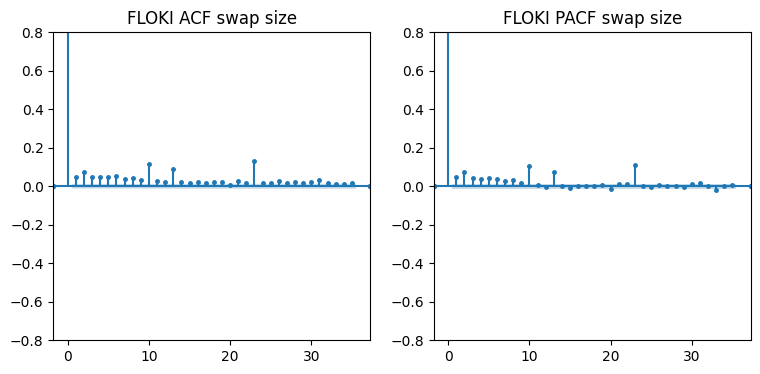

~~~---INJ-WBNB---~~~


d:\Dokumenty\Vejška\Magisterské studium\DIPLOMKA\Code_and_Data\Data_scraping\DEX_data_scraper\venv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


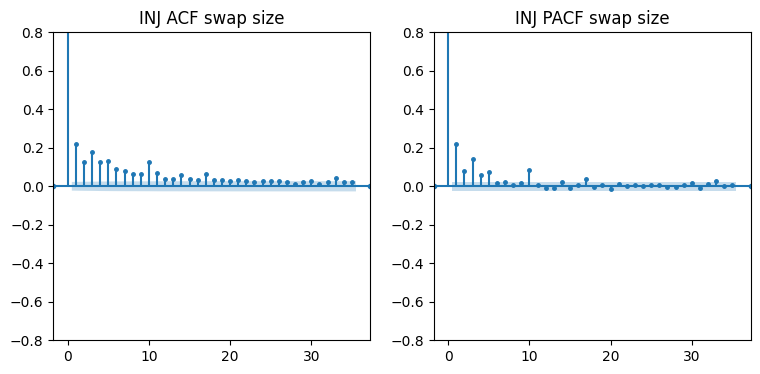

~~~---MBOX-WBNB---~~~


d:\Dokumenty\Vejška\Magisterské studium\DIPLOMKA\Code_and_Data\Data_scraping\DEX_data_scraper\venv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


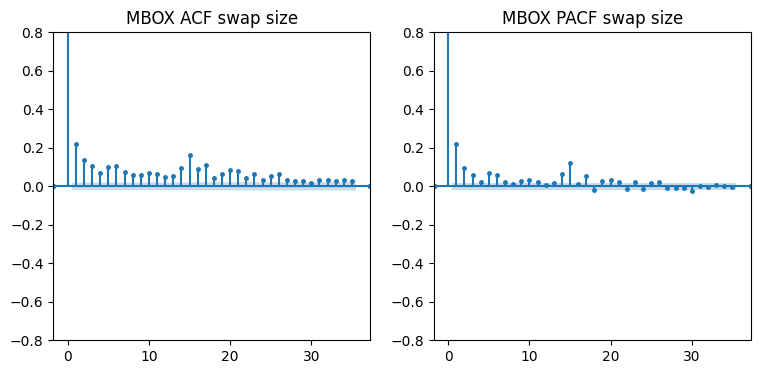

~~~---VOLT-WBNB---~~~


d:\Dokumenty\Vejška\Magisterské studium\DIPLOMKA\Code_and_Data\Data_scraping\DEX_data_scraper\venv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


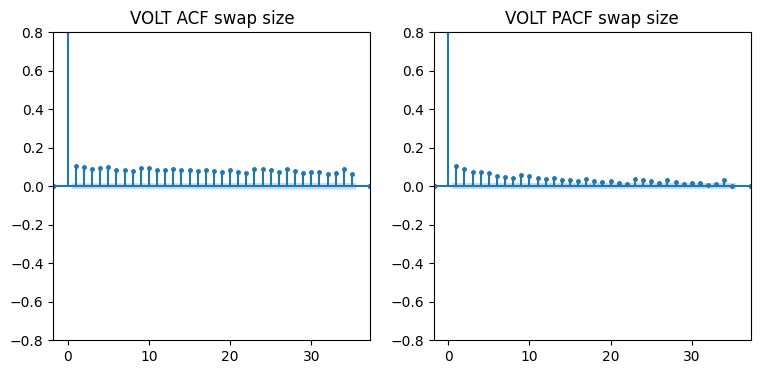

In [9]:
#explore Autocorrelation properties of swap size
for pair in pair_list:
    #geting name of current pair and folder location
    name = pair[0]
    #print(name)
    # if name == "FLOKI-WBNB":
    #     continue
    print(f"~~~---{name}---~~~")
    file_path = f"D:/Dokumenty/Vejška/Magisterské studium/DIPLOMKA/Code_and_Data/Data_scraping/DEX_data_scraper/complete_data/{name}/{name}_complete.csv"

    #loading data without werbose printout, seting index
    df = load_csv_to_df(file_path, verbose=False, name = name)
    set_index(df, info=False)

    data_buy = df[df['buy_order'] == True]
    data_sell = df[df['buy_order'] == False]

    # data = data_buy.total_native
    # data = data_sell.amount_token


    # #transform_fun = lambda x: x
    # transform_fun = np.log10

    # # Define the logarithmically spaced bins
    # bins = np.logspace(np.log10(data_buy.amount_token.min()), np.log10(data_buy.amount_token.max()), 100)


    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))


    # axes[0].hist(log_amount_token_b, bins=bins, color='blue', edgecolor='black')
    # axes[0].set_title(f'{name} Native Tokens swapped_BUY')
    # axes[0].set_xscale('log')
    # axes[0].set_xlim(left = 5*10**(-2), right = 100)

    # bins = np.logspace(np.log10(data_sell.amount_token.min()), np.log10(data_sell.amount_token.max()), 100)
    # axes[1].hist(log_amount_token_s, bins=bins, color='red', edgecolor='black')
    # axes[1].set_title(f'{name} Native Tokens swapped_SELL')
    # axes[1].set_xscale('log')
    # axes[1].set_xlim(left = 5*10**(-2), right = 100)

    lags=35
    limit = 0.8


    #f, ax = plt.subplots(nrows=1, ncols=2, figsize=figsize)
    plot_acf(df.total_native, lags=lags, ax=axes[0], marker = ".",
                title=f"{name[0:-5]} ACF swap size")
    plot_pacf(df.total_native, lags=lags, ax=axes[1], marker = ".",
                title=f"{name[0:-5]} PACF swap size")
    
    axes[0].set_ylim([-1*limit,limit]) 
    axes[1].set_ylim([-1*limit,limit]) 

    #There is a difference, but very subtle. But probably worth trying fitting separetely.
    #Perhaps I might do an overall search on all dists, and then fit the candidates dists on buy/sell separetly..
    #TODO next 
    plt.show()

~~~---AGIX-WETH---~~~


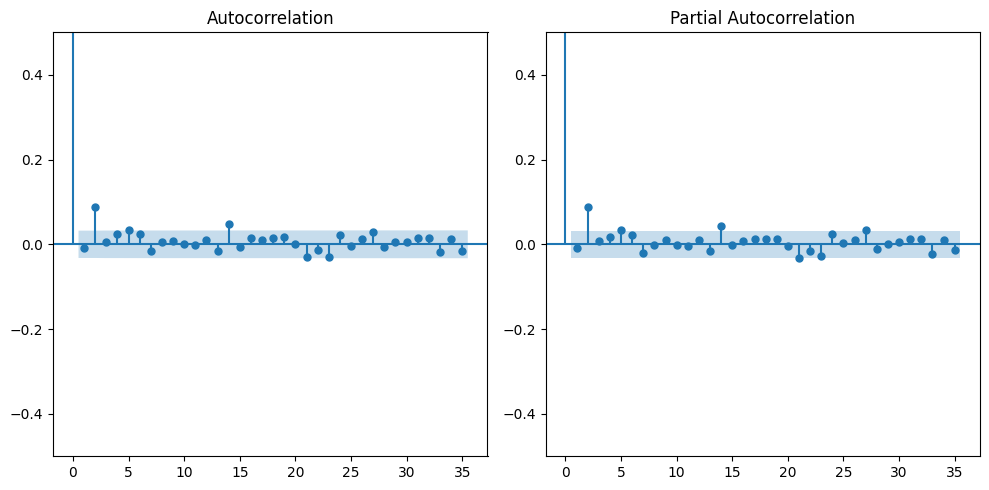

~~~---HEX-WETH---~~~


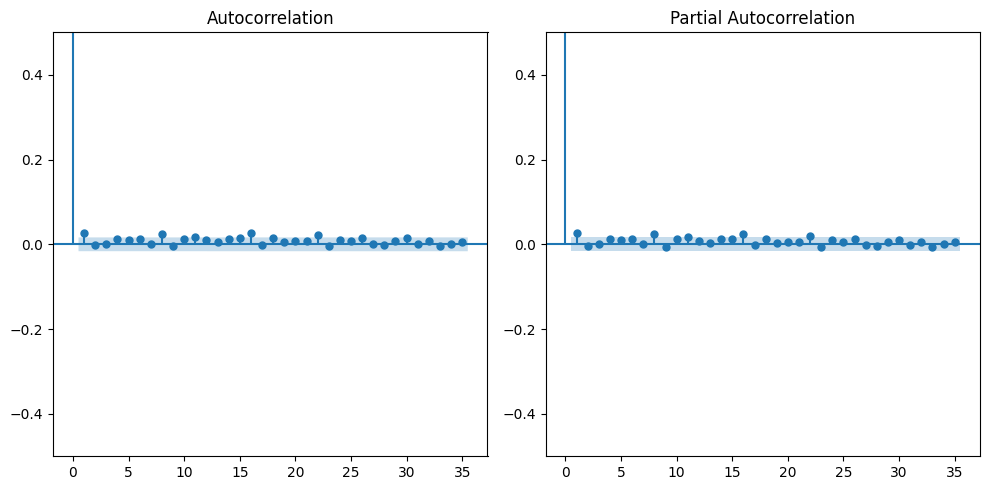

~~~---OPTIMUS-WETH---~~~


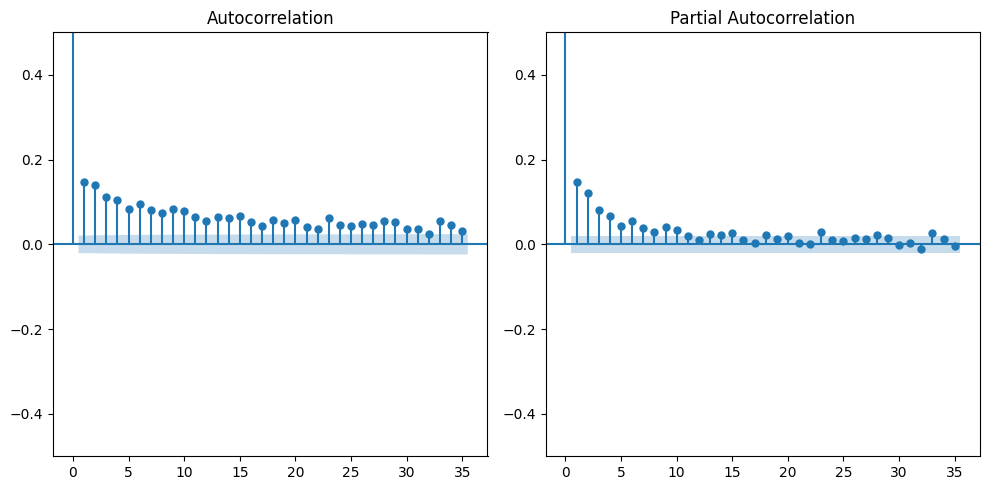

~~~---SHIB-WETH---~~~


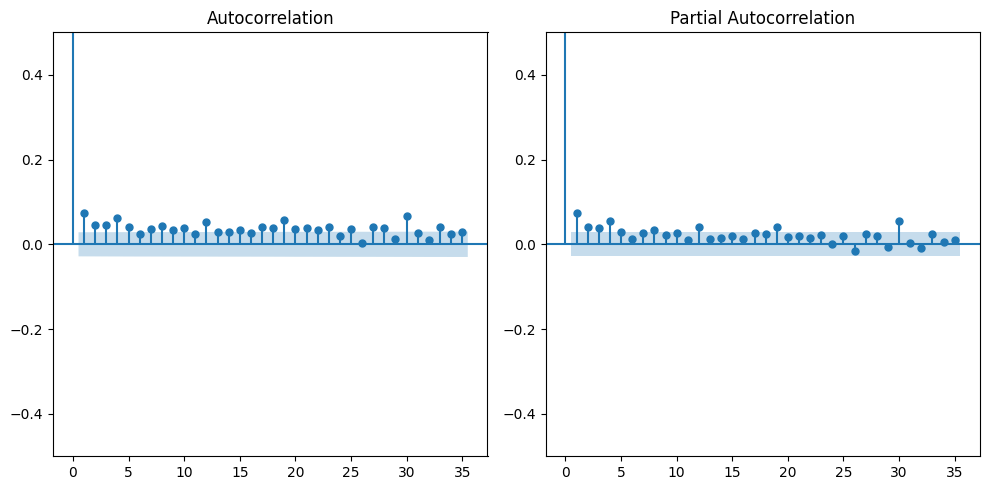

~~~---SHIK-WETH---~~~


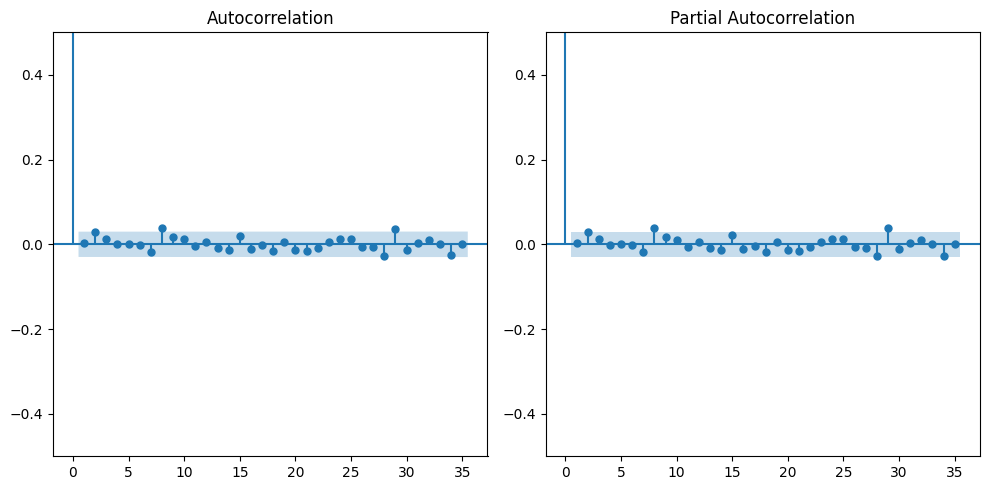

~~~---BabyDoge-WBNB---~~~


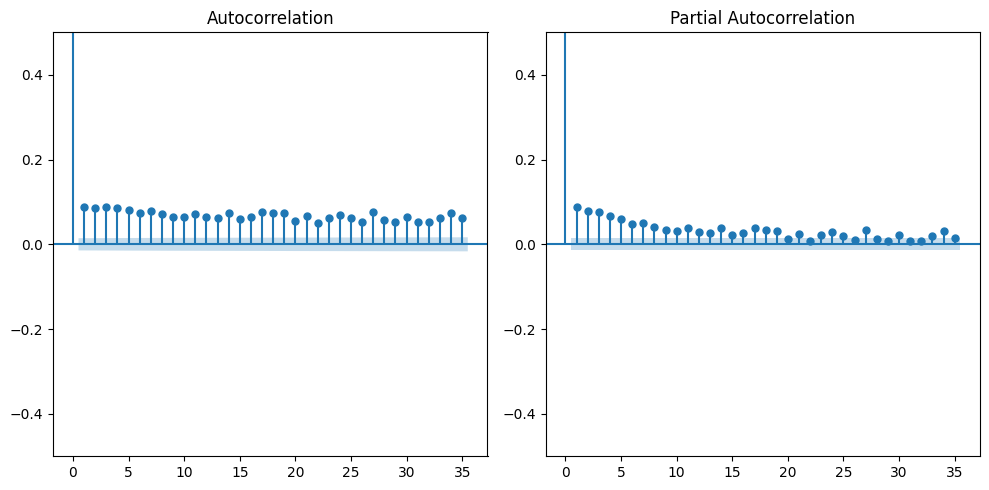

~~~---FLOKI-WBNB---~~~


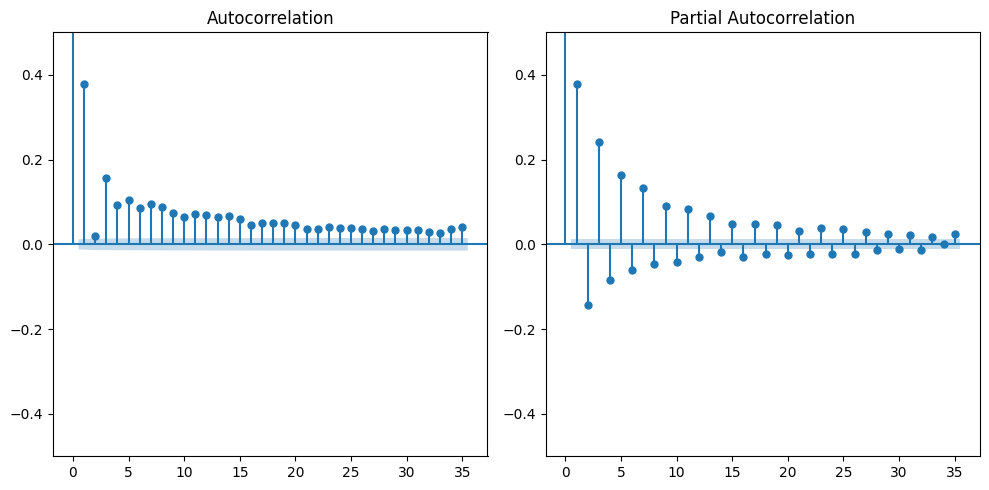

~~~---INJ-WBNB---~~~


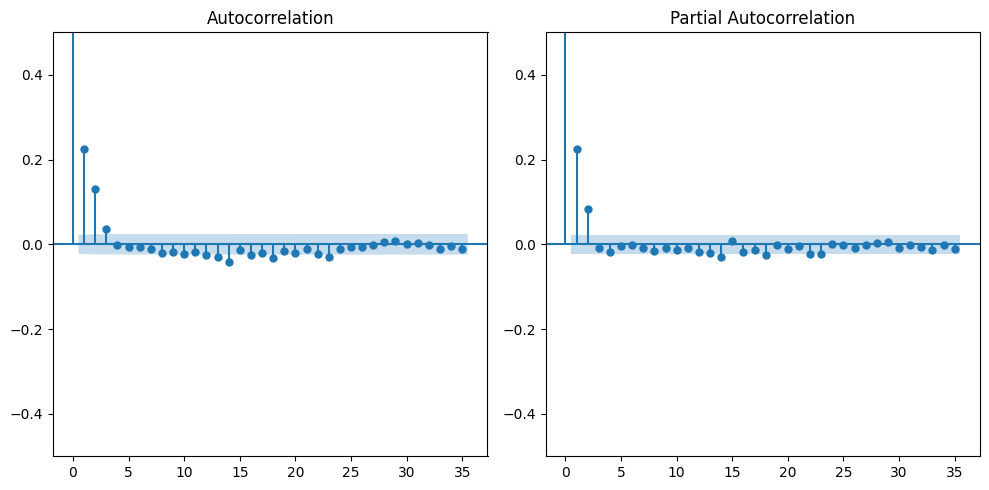

~~~---MBOX-WBNB---~~~


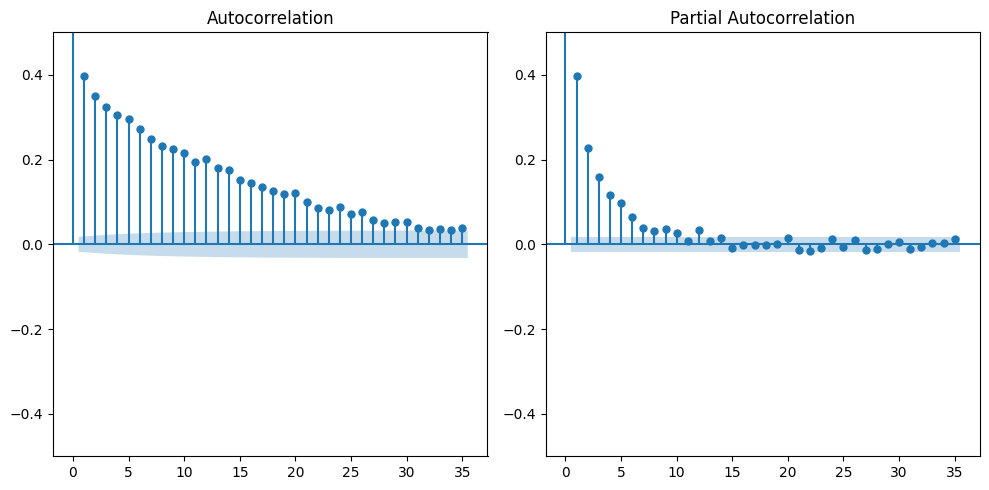

~~~---VOLT-WBNB---~~~


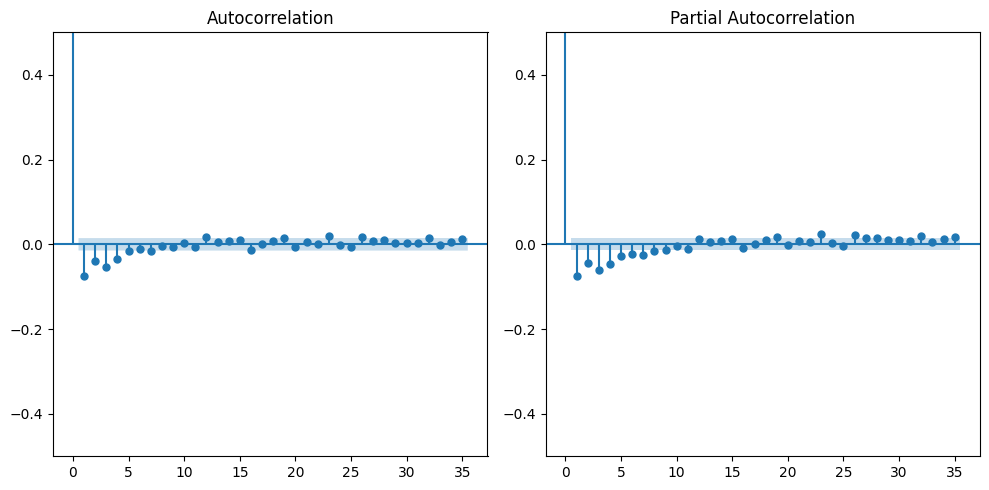

In [10]:
##Part 3 - modelling BUY / SELL orders
for pair in pair_list:
    #geting name of current pair and folder location
    name = pair[0]
    #print(name)
    # if name == "FLOKI-WBNB":
    #     continue
    print(f"~~~---{name}---~~~")
    file_path = f"D:/Dokumenty/Vejška/Magisterské studium/DIPLOMKA/Code_and_Data/Data_scraping/DEX_data_scraper/complete_data/{name}/{name}_complete.csv"

    #loading data without werbose printout, seting index
    df = load_csv_to_df(file_path, verbose=False, name = name)
    set_index(df, info=False)   

    #print(list(map(int, df.buy_order)))
    #we have one NA
    #print(len(df.buy_order), len(df[df['buy_order'] == True]), len(df[df['buy_order'] == False]), len(df.buy_order)-len(df[df['buy_order'] == False]) - len(df[df['buy_order'] == True]))

    orders = df.buy_order.astype(float).fillna(0).astype(int)

    #ADF strongly rejects stationarity (does it makes sense in binary context?)

    plot_acf_pacf = True
    if plot_acf_pacf:
        lags = 35
        limit = 0.5

        f, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
        plot_acf(orders, lags=lags, ax=ax[0])
        plot_pacf(orders, lags=lags, ax=ax[1], method='ols')
        #https://www.statsmodels.org/dev/generated/statsmodels.graphics.tsaplots.plot_acf.html #link for the function
        ax[0].set_ylim([-1*limit,limit]) 
        ax[1].set_ylim([-1*limit,limit]) 

        plt.tight_layout()
        plt.show()

    


    ###The ARMA model
    ARIMA_modelling = False
    if ARIMA_modelling:
        transformed_series = pd.Series(logit(orders.clip(1e-3, 1 - 1e-3)).values.ravel())
        #print(transformed_series)

        m = SARIMAX(transformed_series, order=(p, 0, 0), enforce_invertibility=False)
        model = m.fit(disp=True)

        model.plot_diagnostics(figsize=(12, 8))
        plt.show()

        print(model.summary())

        #I could use an approach of taking parameters of MBOX and 
        # generating the probabilities from them, past values with the logit transform and normally distributed rabdom error N(0,1)
        #MBOX params from ARIMA(12,0,0): [0.2274293,  0.13147551, 0.09604017, 0.07126801, 0.06839098, 0.04348023, 0.02150476, 0.01732428, 0.02471407, 0.02150801, 0.00102558, 0.03491916]
        #perhaps also try mimicking the behavior by hand just from observing from the PACF plot (for example AGIX vs FLOKI vs MBOX)

        #print(model.arparams)

    best_order_search = False
    if best_order_search:
        transformed_series = pd.Series(logit(orders.clip(1e-3, 1 - 1e-3)).values.ravel())

        all_res = {}
        best_model = None
        best_aic, best_order = np.inf, 0
        for p in range(1,15):
            m = SARIMAX(transformed_series, order=(p, 0, 0), enforce_invertibility=False)
            try:
                model = m.fit(disp=False)
                all_res[(p)] = model.aic
            except:
                all_res[(p)] = np.inf
                
            if all_res[(p)] < best_aic:
                best_aic = all_res[(p)]
                best_order = (p)
                best_model = model

            print('BEST ORDER', best_order, 'BEST AIC:', best_aic)
        

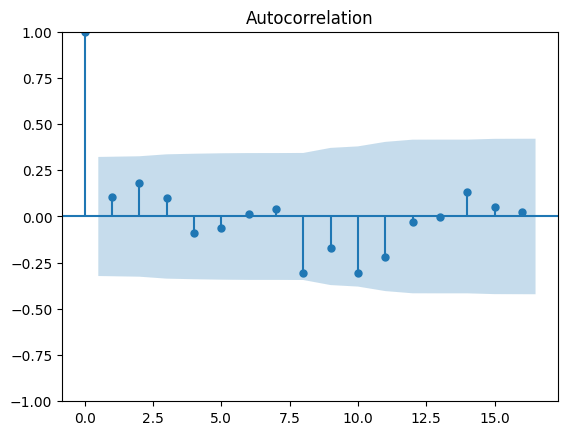

36   -6.906755
dtype: float64
ar.L1      0.611868
ma.L1     -0.479530
sigma2    46.324629
dtype: float64
Predicted next value: 36    0.303191
dtype: float64 manualy
Predicted next value: 37    0.303191
dtype: float64 model.forecast


In [11]:
##Testing for the ARMA model
# from scipy.special import expit, logit
# from statsmodels.tsa.statespace.sarimax import SARIMAX

# test data
test_df = pd.DataFrame([0,1,1,1,1,1,1,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0,1,1,1,1,0,0,0,0,0,1,0,0,0,1,0])

plot_acf(test_df)
plt.show()

transformed_series = pd.Series(logit(test_df.clip(1e-3, 1 - 1e-3)).values.ravel())
print(transformed_series[-1:])

m = SARIMAX(transformed_series, order=(1, 0, 1), enforce_invertibility=False)
model = m.fit(disp=True)

# model.plot_diagnostics(figsize=(12, 8))
# plt.show()

# model.summary()



##prediction of the next value
#Get the estimated parameters
params = model.params

print   (params)
# Get the lagged values from the transformed series
lagged_values = transformed_series[-1:]

# Compute the next value based on the estimated parameters and lagged values
next_value = params['ar.L1'] * lagged_values + params['ma.L1'] * model.resid[-1:]

print("Predicted next value:",expit(next_value), "manualy")

next_value = model.forecast(steps=1)
print("Predicted next value:", expit(next_value), "model.forecast")


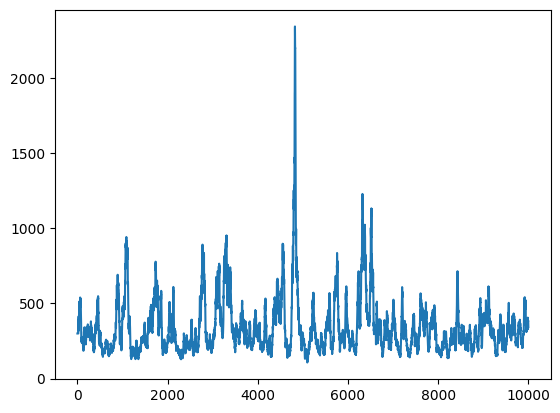

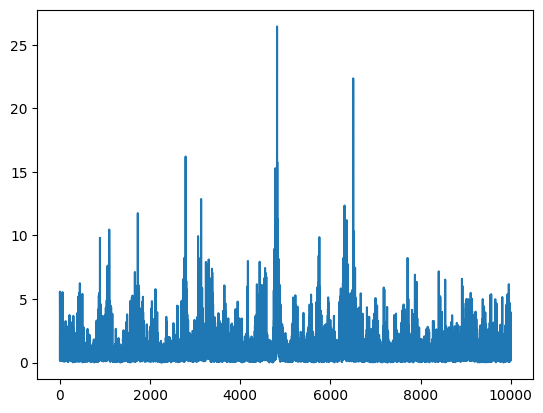

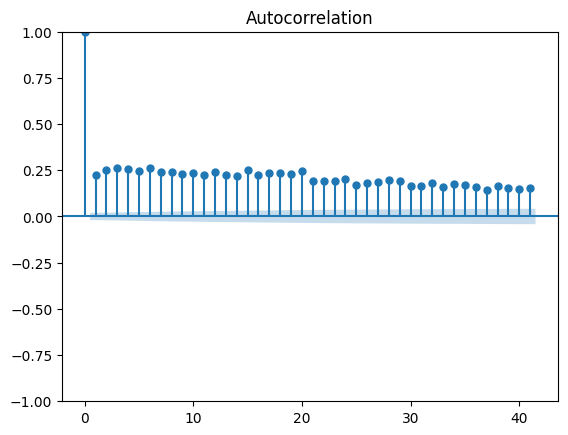

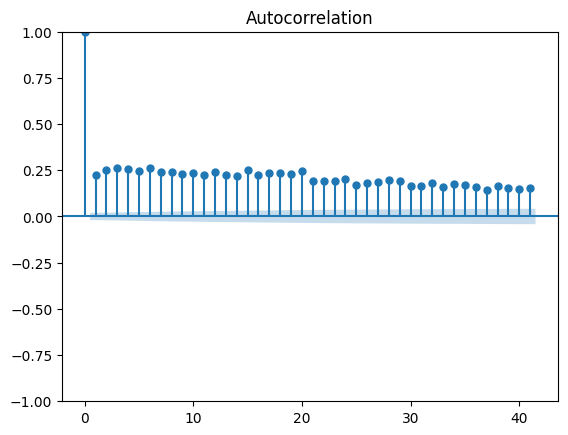

In [12]:
##Testing for transaction time herding
expon.stats(loc=0, scale=300, moments='m')

scale = 300
base_scale = 35


scaling_denominator = scale/(scale-base_scale)



past_window = 20
times = []
scales = [scale]
times.append(float(expon.rvs(loc = 0, scale=scale, size = 1)))

for i in range(10000):
    if i <= past_window:
        new_time = float(expon.rvs(loc = 0, scale=scale, size = 1))
        scales.append(scale)
    else:
        average_scale = np.mean(times[-past_window:])/scaling_denominator
        scales.append(base_scale + average_scale)

        new_time = float(expon.rvs(loc = 0, scale=base_scale, size = 1)) + float(expon.rvs(loc = 0, scale=average_scale, size = 1))



    times.append(new_time)

plt.plot(scales)
plt.show()


plt.plot(np.array(times)/300)
plt.show()

plot_acf(np.array(times))
#Ok, I think I have a basec prototype of herding behavior, next to implement it

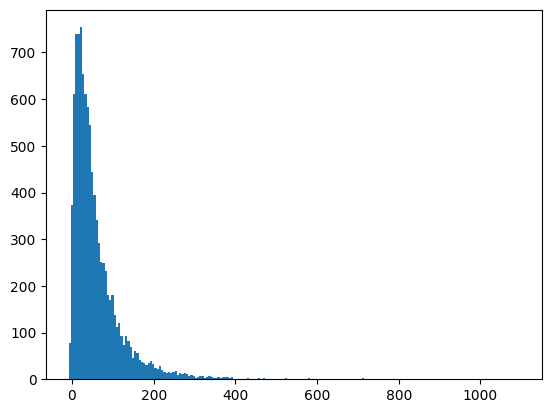

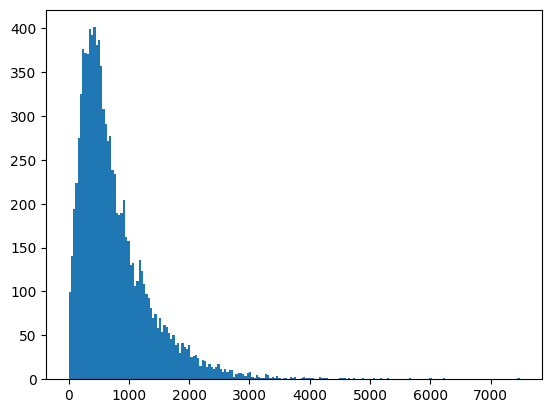

209


In [13]:
##Testing the lognormal distribution -- looking for a suitable specification
#r = [x for x in lognorm.rvs(s = 0.85, loc = 0, scale = 150, size = 10000) if x >0]
r = lognorm.rvs(s = 0.8, loc = -10, scale = 50, size = 10000)
x = [x for x in exponnorm.rvs(K=4, loc=150, scale=150, size=10000) if x > 0]
#x = exponnorm.rvs(K=4, loc=150, scale=150, size=10000)


plt.hist(r, bins= 200)
plt.show()

plt.hist(x, bins= 200)
plt.show()


print(len(r[r<0]))




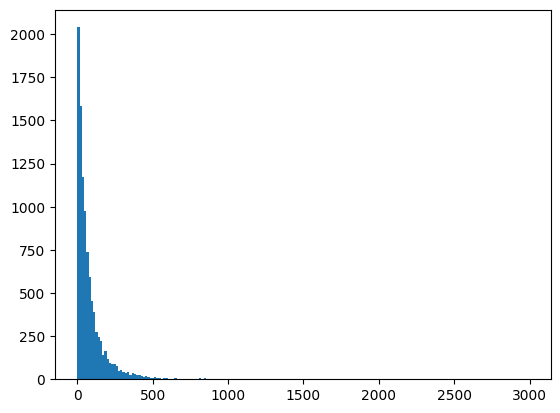

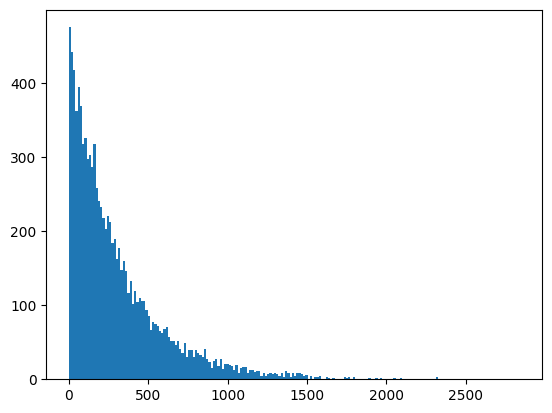

In [25]:
##Testing the pareto distribution for random times -- looking for a suitable specification
#r = [x for x in lognorm.rvs(s = 0.85, loc = 0, scale = 150, size = 10000) if x >0]
#r = pareto.rvs(b = 3, loc = -150, scale = 150, size=10000)
r = pareto.rvs(b = 4, loc = -250, scale = 250, size=10000)
x = expon.rvs(loc = 0, scale=300, size = 10000)
#x = exponnorm.rvs(K=4, loc=150, scale=150, size=10000)


#'b': 3.0278565774644837, 'loc': -346.0979909671822, 'scale': 346.09


plt.hist(r, bins= 200)
plt.show()

plt.hist(x, bins= 200)
plt.show()